yolov4提出于2020年的论文"YOLOv4: Optimal Speed and Accuracy of Object Detection"，文中指出，一些trick是只针对于特定场景的，而本文探索了一些普适的trick,包括：WRC、CSP、CmBN、SAT、mish激活函数。最终在coco上取得了43.5%的精度。

目标检测系统通常由backbone、neck、head组成：
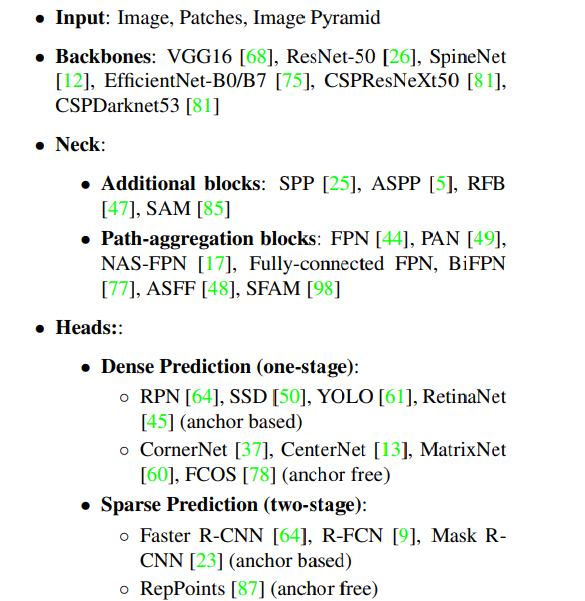

bag of freebies<br/>
只影响训练时间，而不增加推理时间的trick，作者称为"bag og freebies"。<br/>
首先是数据集扩增，经典的包括photometric distortions与geometric distortions，其他包括改变原始像素信息的，如：random erasing，cutout,hide-and-seek,grid mask,应用与特征图的方法包括dropout、dropconnet、dropblock，此外还有mixup、cutmix，还有style transfer GAN，用于减少纹理偏差。

解决类别不均衡问题有negative example mining、OHEM(two-stage)与focal loss(one-stage)

label-smoothing将标签处理为平滑标签，另外，知识蒸馏被用来设计标签refinement网络。

iou loss,giou,diou,ciou

Bag of specials<br/>
一些模块或后处理操作，只增加一点推理时间，但显著增加精度的trick，作者称为bag of specials<br/>
包括SPP、ASPP、RFB，spp在yolov3上提升2.7个点，RFB在SSD上提升了7个点。

注意力机制：SE在resnet50的分类上提升了1个点，但在GPU上增加了较多时间，因此适合在cpu上使用。SAM在resnet50-se的基础上有提升了0.5个点

特征融合方面，有FPN，SFAM,ASFF,BiFPN,PANNet

激活函数方面，ReLU用于解决梯度消失问题，LReLu,PReLU用于解决relu负数时为0的问题，ReLU6与hard-swish是为量化网络设计的，SELU用于自归一化网络，此外，最新的包括swish与mish

后处理方面，包括NMS，soft-NMS，Diou NMS.Ancohr-free方法中不需要postprocessing

网络结构选择<br/>
backbone:CSPDarknet53 for Imagenet，CSPResNext50 for coco<br/>
其他模块：SPP来增大感受野,PANET来特征融合<br/>
head:yolov3

没有用cross-GPU BN(如CGBN或syncBN)，为了在单块卡上跑模型，适用于大多数人。

BoF与BoS的选择<br/>
通常用以下方法来增强网络表现：
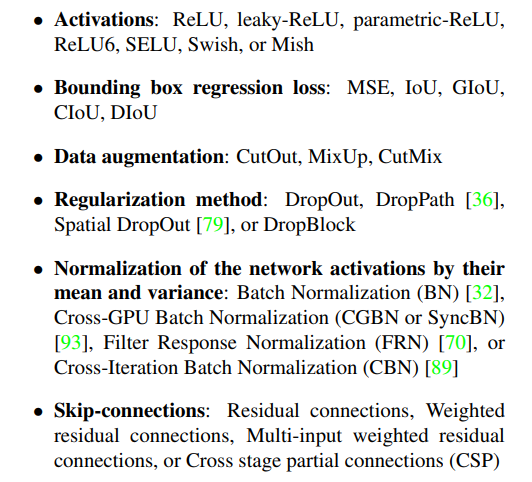


为了能让模型在一块卡上跑，作者应用了以下方法：<br/>
1)mosaic,self-adversarial training(SAT)<br/>
2)遗传算法<br/>
3)modified SAM, modified PAN, and Cross mini-Batch Normalization (CmBN)

mosaic方法是一种新的数据集扩增方法，BN是在4张图像上计算，因此大大减少了mini-batch size
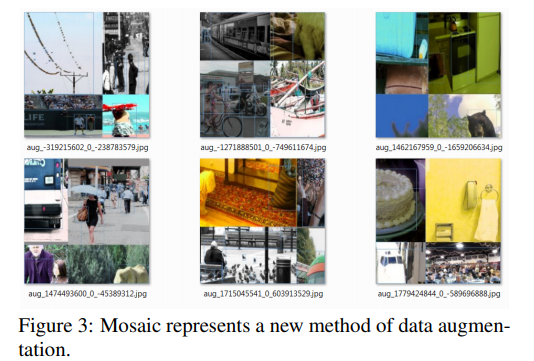

自对抗训练包括两个阶段，首先产生新的样本，其次在总的样本上进行SGD

CmBN为CBN的改进版本：
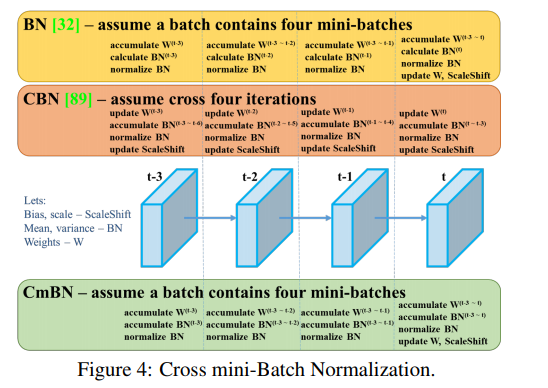

作者修改了SAM，由spatial-wise改为point-wise，另外修改了PAN，将add操作改为cat操作
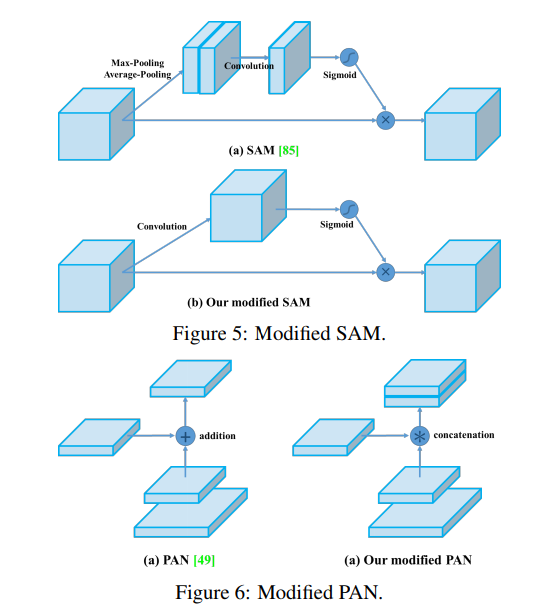

yoloV4整体结构如下：
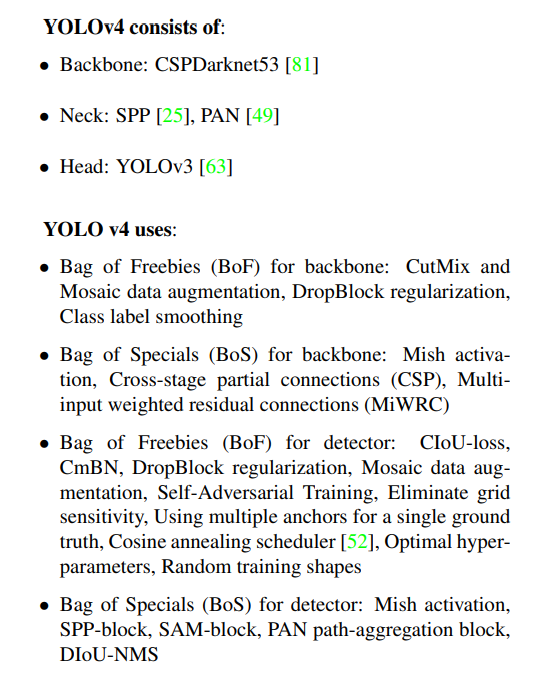

实验部分：<br/>
各种数据集扩增方法：
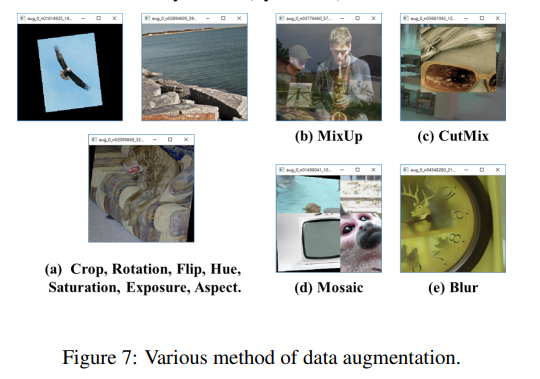

消融实验如下图：
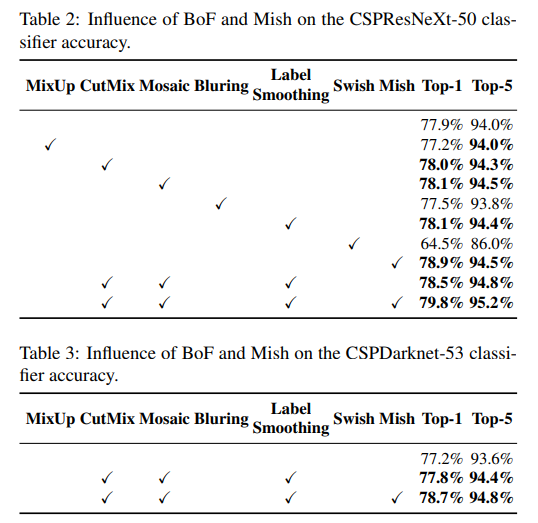

BoF消融实验：
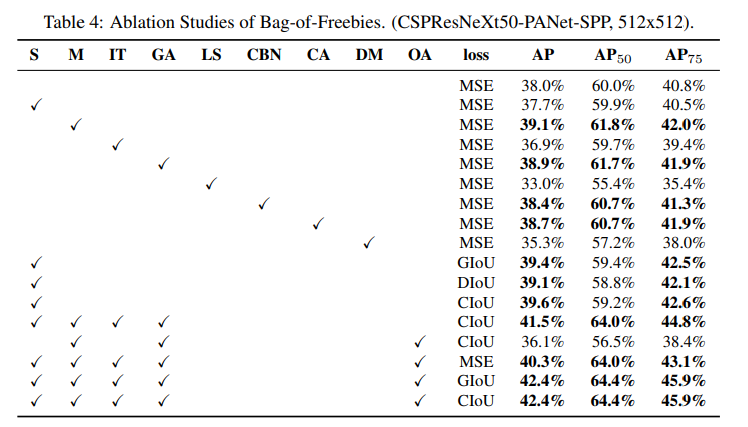

各方法含义如下：
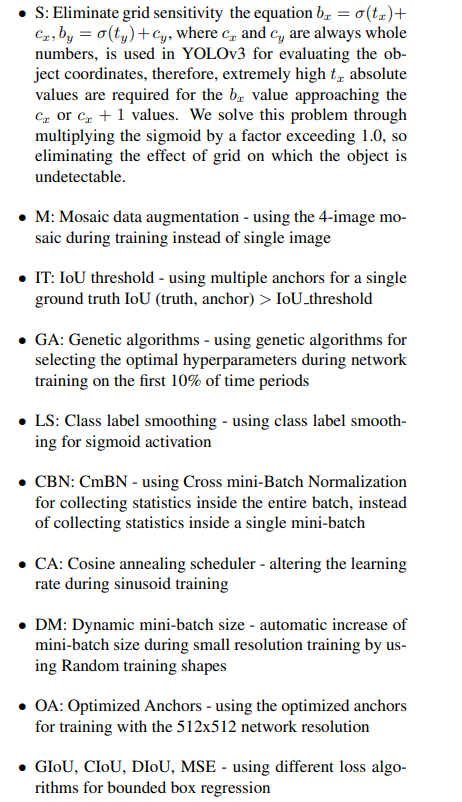


BoS消融实验如下：
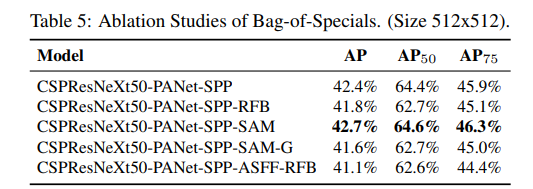

backbone对比实验如下，并不是在分类表现好的模型在detection领域就一定好。
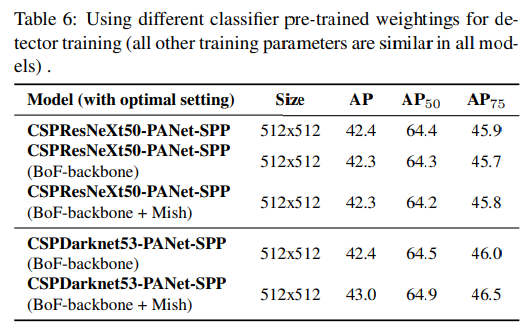

mini-batch对比实验如下，用BoF与BoS之后，mini-batch的影响没有那么大了：
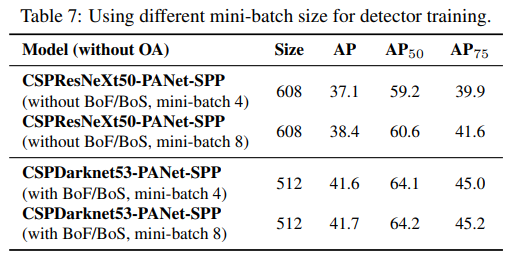